In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,20))

## Download Daily Stock Prices
pandas_datareader is a great library. Currently python API for yahoo finannce and Google Finance both don't work.

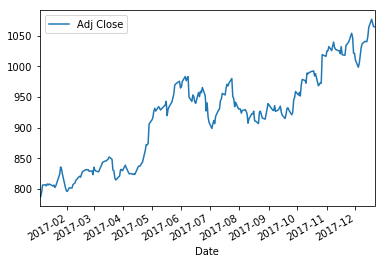

In [86]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 12, 21)
GOOG_data = web.DataReader("GOOG", 'yahoo', start, end)
#yahoo_data=yahoo_data.reset_index(None)
GOOG_data[['Adj Close']].plot()

## Bolinger Bands
*Bolinger band =  rolling mean +/- 2 x rolling standard deviation*

As per technical analysis, when stock price crosses lower bolinger band it is a buy signal while when it crosses upper bolinger band it is sell signal. **Not a hard and fast rule**

In [87]:
window=20
GOOG_data['rolling_mean'] = GOOG_data[['Adj Close']].rolling(window=window,center=False).mean()
GOOG_data['rolling_std'] = GOOG_data[['Adj Close']].rolling(window=window,center=False).std()
GOOG_data['lower_band'] = GOOG_data['rolling_mean'] - 2*GOOG_data['rolling_std']
GOOG_data['upper_band'] = GOOG_data['rolling_mean'] + 2*GOOG_data['rolling_std']

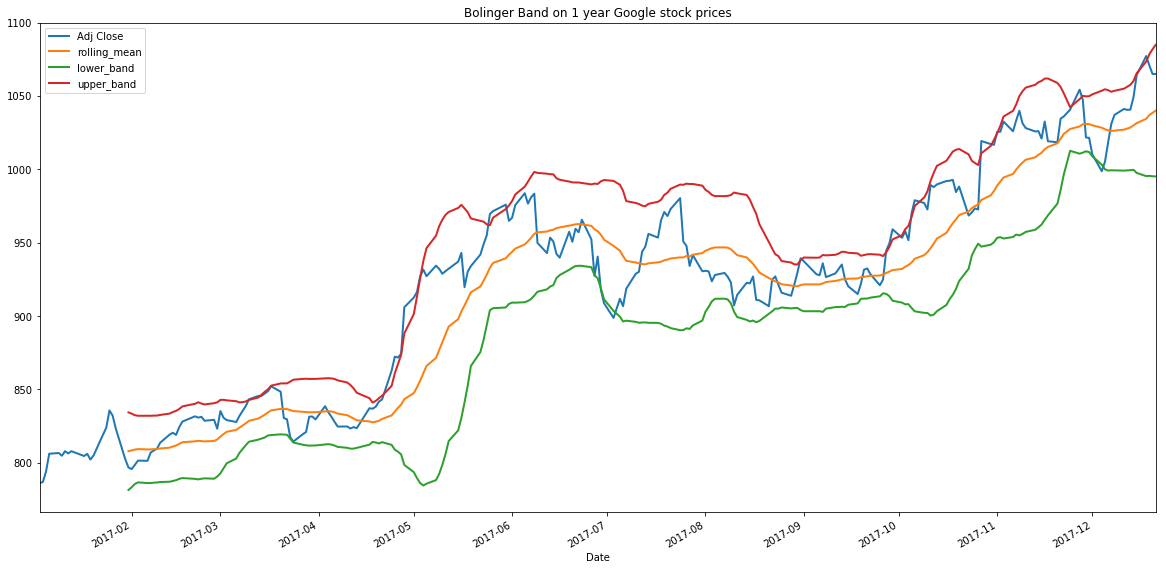

In [89]:
GOOG_data[['Adj Close','rolling_mean','lower_band','upper_band']].plot(figsize=(20,10),lw=2,
                                                            title="Bolinger Band on 1 year Google stock prices")

## Daily Returns

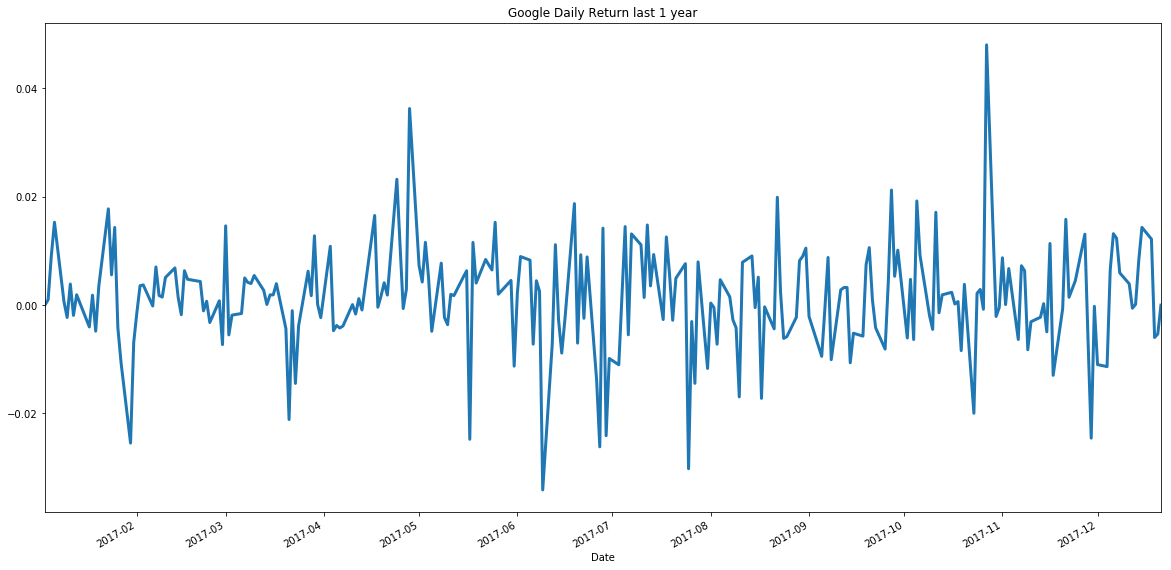

In [90]:
GOOG_data['daily_returns'] = GOOG_data[['Adj Close']].pct_change().fillna(0)
GOOG_data['daily_returns'].plot(figsize=(20,10),lw=3,title="Google Daily Return last 1 year")

* Genarlly **Daily Returns** are noramlly dstributed but **not always**.
* Kurtosis is an important property which tells about the flat tails. If greater than 3 then fat tail else flat tail. 

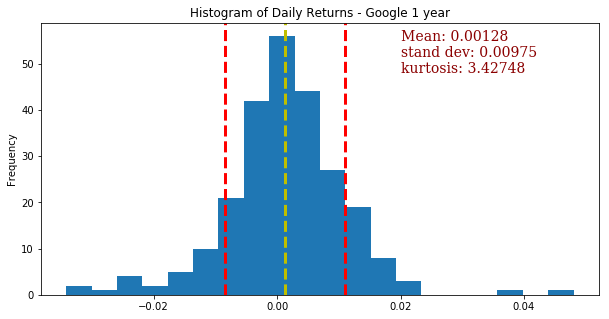

In [91]:
font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 14,}
mean = GOOG_data['daily_returns'].mean()
std = GOOG_data['daily_returns'].std()
kurtosis = GOOG_data['daily_returns'].kurtosis()
GOOG_data['daily_returns'].plot(kind='hist',figsize=(10,5),title="Histogram of Daily Returns - Google 1 year",bins=20)
s = "Mean: " + str(round(mean,5)) + "\nstand dev: " + str(round(std,5)) + "\nkurtosis: " + str(round(kurtosis,5))
plt.axvline(mean,color='y',ls='dashed',lw=3)
plt.axvline(mean-std,color='r',ls='dashed',lw=3)
plt.axvline(mean+std,color='r',ls='dashed',lw=3)
plt.text(0.02,48,s,fontdict=font)

## Cumulative Returns

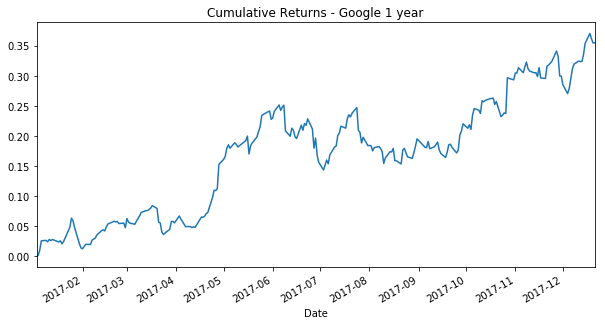

In [92]:
GOOG_data['cum_returns']=GOOG_data[['Adj Close']]/GOOG_data[['Adj Close']].iloc[0]-1
GOOG_data['cum_returns'].plot(title="Cumulative Returns - Google 1 year",figsize=(10,5))